In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spammail/spam.csv


In [25]:
df = pd.read_csv("/kaggle/input/spammail/spam.csv")
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [26]:
df.groupby("Category").describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

# converting catg data ham spam to numerical

In [27]:
df["spam"] = df["Category"].apply(lambda x:1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [28]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(df.Message,df.spam,test_size=0.25)

# converting message to numerical data using 'sklearn countVectorizer'

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
v= CountVectorizer()
X = v.fit_transform(train_x.values) #learns the vocabulary from the trsin_x.values and transforms them into a document-term matrix X(num data)

#X will be a sparse matrix where each row corresponds to a document and each column corresponds to a word in the vocabulary.

#toarray() converts the sparse matrix X into a dense matrix for easier inspection (not typically done with large datasets).
X.toarray()
X.shape

(4179, 7412)

# applying multinomial naive bayes

In [30]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X,train_y)

X_test = v.transform(test_x)
model.score(X_test,test_y)

0.9870782483847811

In [31]:
emails =[
    "congratulations you are hired for the post of ML intern",
    "yay!!! upto 50% discount on all clothes. Hurry!!!!"
]
emails_n= v.transform(emails) #conv catg data into numerical data
model.predict(emails_n)

array([0, 1])

# can also be done using sklearn pipeline

In [33]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vec',CountVectorizer()), #step1: conv text to wordcount
    ('nb',MultinomialNB()) #step2: applying Naive Bayes
])

#now we can directly apply .fit
clf.fit(train_x,train_y)
clf.score(test_x,test_y)
y_pred=clf.predict(test_x)

In [34]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_pred,test_y)
cm

array([[1212,   11],
       [   7,  163]])

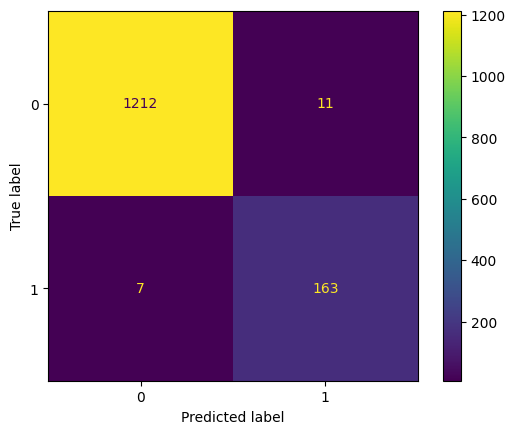

In [40]:
cmDisp = ConfusionMatrixDisplay(confusion_matrix=cm)
cmDisp.plot()